In [33]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
strok=pd.read_csv("C:/Users/SHRUTI/OneDrive/Desktop/MLT DATASETS/Stroke Prediction/healthcare-dataset-stroke-data.csv")
import warnings
warnings.filterwarnings("ignore")

In [2]:
strok.drop(["id"], axis = 1, inplace = True)


In [3]:
strok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
strok.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
strok.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#to remove null values from the bmi column we use imputer
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
strok['bmi'] = impute.fit_transform(strok[['bmi']])

In [7]:
strok.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

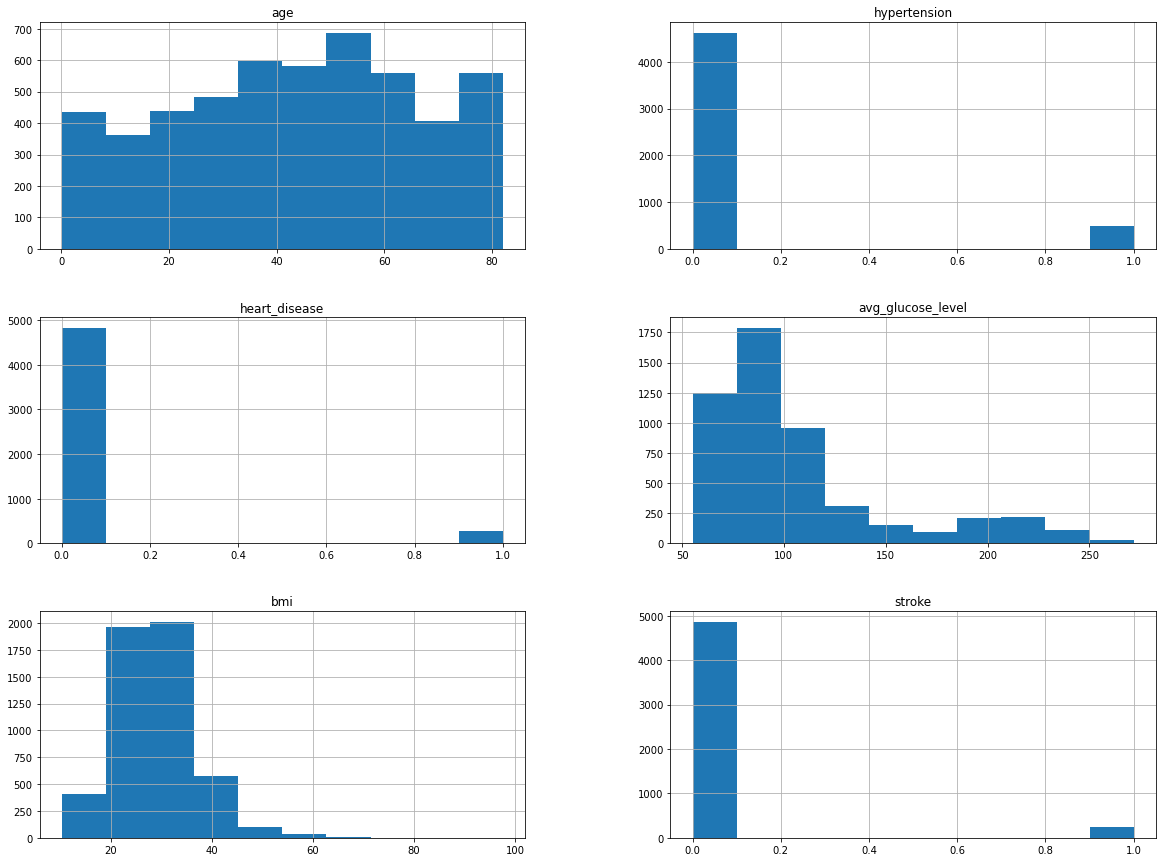

In [8]:
#exploring the data distributions
strok.hist(figsize=(20,15))
plt.show()

In [9]:
#finding correlation
import seaborn as sns
cor_features=strok.corr()
corr=cor_features.corr()
display(corr)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,-0.032740,-0.050151,-0.157079,0.142294,-0.096522
hypertension,-0.032740,1.000000,-0.299565,-0.173608,-0.134677,-0.242107
heart_disease,-0.050151,-0.299565,1.000000,-0.171440,-0.428667,-0.165969
avg_glucose_level,-0.157079,-0.173608,-0.171440,1.000000,-0.141157,-0.249728
bmi,0.142294,-0.134677,-0.428667,-0.141157,1.000000,-0.427079
stroke,-0.096522,-0.242107,-0.165969,-0.249728,-0.427079,1.000000


<AxesSubplot:>

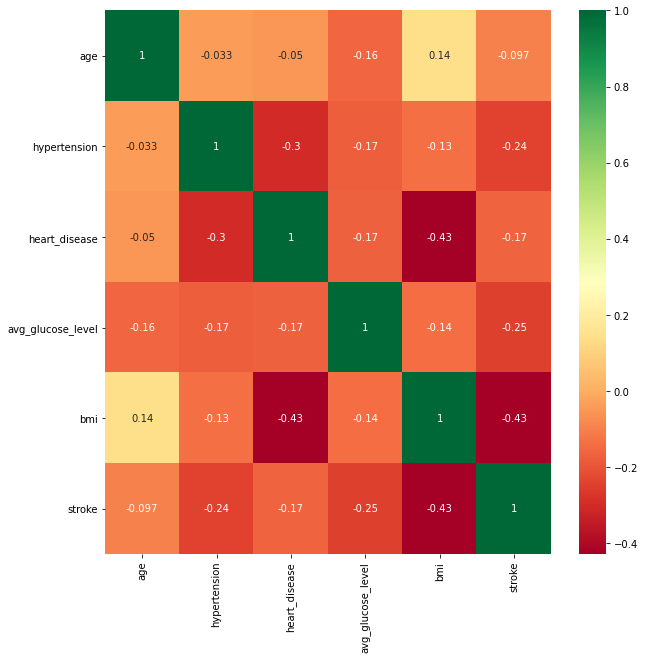

In [10]:
#drawing a heatmap of this
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap='RdYlGn')

In [11]:
#avg age of males having a stroke
strok[(strok.stroke ==  1) & (strok.gender == 'Male')].age.mean()


68.5

In [12]:
#avg age of females getting a stroke
strok[(strok.stroke ==  1) & (strok.gender == 'Female')].age.mean()


67.13702127659575

Text(0.5, 1.0, 'GENDER-Stroke')

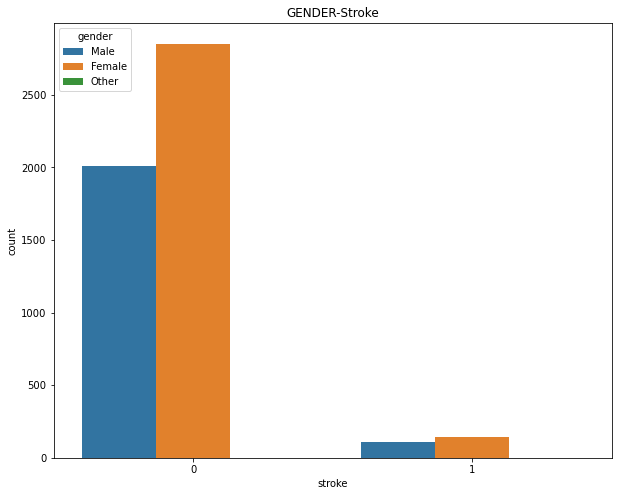

In [13]:
#exploring which gender wise stroke
plt.figure(figsize=(10,8))
sns.countplot(x="stroke", data=strok,hue = 'gender').set_title("GENDER-Stroke")


Text(0.5, 1.0, 'HYPERTENSION-Stroke')

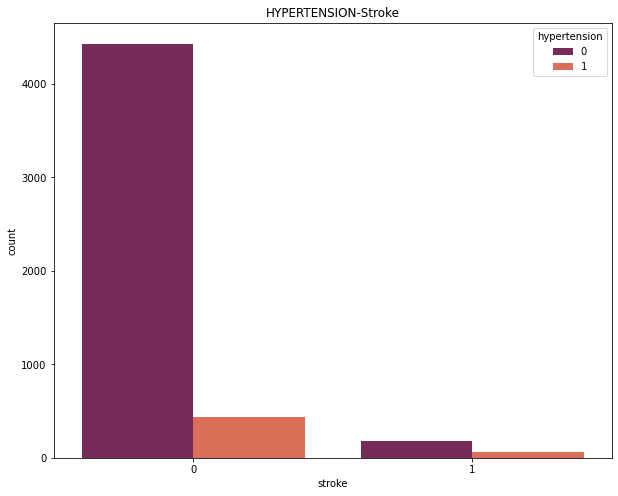

In [14]:
#hypertension wise
plt.figure(figsize=(10,8))
sns.countplot(x="stroke", data=strok,hue = 'hypertension',palette='rocket').set_title("HYPERTENSION-Stroke")


Text(0.5, 1.0, 'Heartdisease-Stroke')

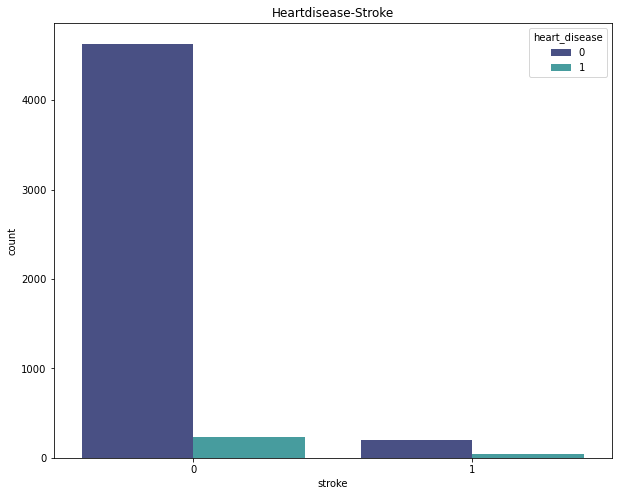

In [15]:
#heart disease wise
plt.figure(figsize=(10,8))
sns.countplot(x="stroke", data=strok,hue = 'heart_disease',palette='mako').set_title("Heartdisease-Stroke")


Text(0.5, 1.0, 'Work type-Stroke')

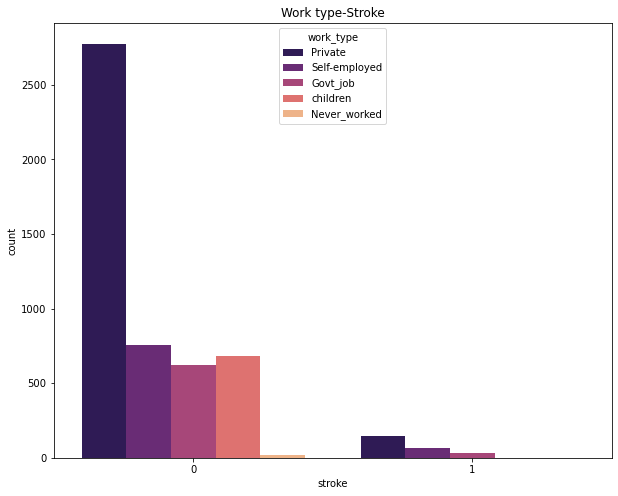

In [16]:
#workwise
plt.figure(figsize=(10,8))
sns.countplot(x="stroke", data=strok,hue = 'work_type',palette='magma').set_title("Work type-Stroke")


Text(0.5, 1.0, 'Marital status-Stroke')

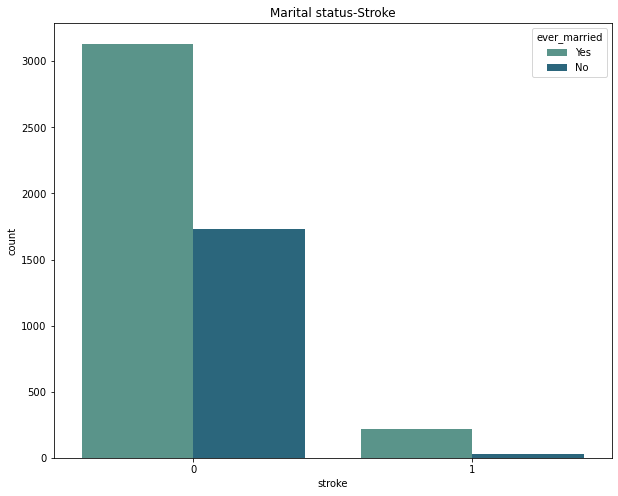

In [17]:
#marital status wise
plt.figure(figsize=(10,8))
sns.countplot(x="stroke", data=strok,hue = 'ever_married',palette='crest').set_title("Marital status-Stroke")


Text(0.5, 1.0, 'Glucoselevel-Stroke')

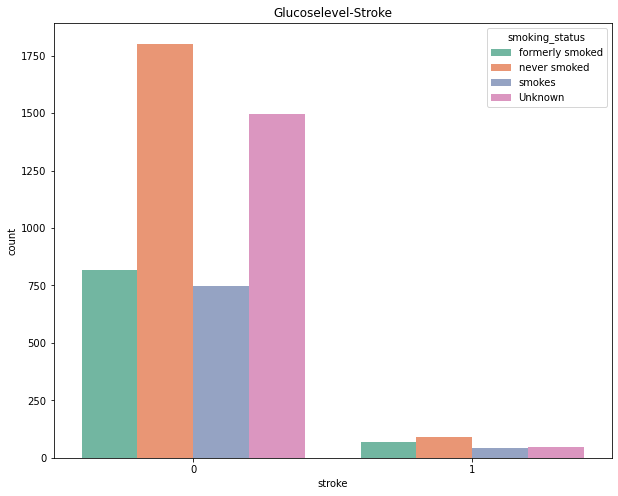

In [18]:
#glucoselevel wise
plt.figure(figsize=(10,8))
sns.countplot(x="stroke", data=strok,hue = 'smoking_status',palette='Set2').set_title("Glucoselevel-Stroke")


<AxesSubplot:xlabel='stroke', ylabel='count'>

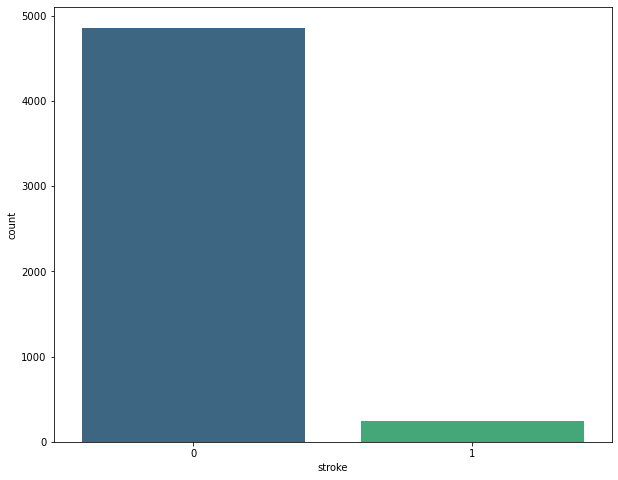

In [19]:
#finally it looks like the data is imbalanced
#plotting the data to check
plt.figure(figsize=(10,8))
sns.countplot(x='stroke',data=strok,palette='viridis')

In [20]:
#the data looks very imbalanced

In [21]:
def onehot_encode(df, column):
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies], axis=1)
    df=df.drop(column, axis=1)
    return df


In [22]:
for column in ['gender','work_type','smoking_status']:
        strok=onehot_encode(strok,column=column)

In [23]:
strok['ever_married']=strok['ever_married'].replace({'No':0, 'Yes':1})
strok['Residence_type']=strok['Residence_type'].replace({'Rural':0, 'Urban':1})

In [24]:
#HANDLING THE IMBALANCE BY OVERSAMPLING THE DATA USING SMOTE
x = strok.drop('stroke', axis = 1)
y = strok['stroke']
smote = SMOTE()
x_oversample, y_oversample = smote.fit_resample(x, y)

In [25]:
print("Before oversampling\n",y.value_counts())
print("After oversampling\n",y_oversample.value_counts())

Before oversampling
 0    4861
1     249
Name: stroke, dtype: int64
After oversampling
 1    4861
0    4861
Name: stroke, dtype: int64


In [26]:
 X_train, X_test, y_train, y_test=train_test_split(x_oversample,y_oversample,train_size=0.7,shuffle=True, random_state=1)

In [27]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train,)

LogisticRegression()

In [28]:
prediction_LR=model1.predict(X_test)

In [29]:
print(accuracy_score(y_test,prediction_LR))

0.9341789509770312


In [34]:
print(classification_report(y_test,prediction_LR))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1453
           1       0.95      0.92      0.93      1464

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



In [30]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
preddtc=DTC.predict(X_test)

In [39]:
print(accuracy_score(y_test,preddtc))

0.9444634898868701


In [36]:
print(classification_report(y_test,preddtc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1453
           1       0.94      0.95      0.95      1464

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [38]:
predrfc=RFC.predict(X_test)

In [40]:
print(accuracy_score(y_test,predrfc))

0.9718889269797737


In [41]:
print(classification_report(y_test,predrfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1453
           1       0.98      0.96      0.97      1464

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



In [42]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=0)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [43]:
predGbc=GBC.predict(X_test)

In [44]:
print(accuracy_score(y_test,predGbc))

0.9520054850874186


In [45]:
print(classification_report(y_test,predGbc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1453
           1       0.97      0.93      0.95      1464

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



In [48]:
#SVM LINEAR KERNEL
from sklearn import svm
svm_class=svm.SVC(kernel='linear', gamma='auto', C=1)
svm_class.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [49]:
predSVM=svm_class.predict(X_test)

In [50]:
print(accuracy_score(y_test,predSVM))

0.9444634898868701


In [51]:
print(classification_report(y_test,predSVM))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1453
           1       1.00      0.89      0.94      1464

    accuracy                           0.94      2917
   macro avg       0.95      0.94      0.94      2917
weighted avg       0.95      0.94      0.94      2917



In [54]:
from sklearn.neighbors import KNeighborsClassifier
Knn_class=KNeighborsClassifier()
Knn_class.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
predKNN=Knn_class.predict(X_test)

In [56]:
print(accuracy_score(y_test,predKNN))

0.8837847103188207


In [57]:
print(classification_report(y_test,predKNN))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1453
           1       0.82      0.98      0.89      1464

    accuracy                           0.88      2917
   macro avg       0.90      0.88      0.88      2917
weighted avg       0.90      0.88      0.88      2917

